In [2]:
!pip install tensorflow


In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.19.0
Num GPUs Available: 1


In [4]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
# import basic lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [9]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [10]:
# Feature engineering part
geography = pd.get_dummies(x["Geography"], drop_first=True)
gender = pd.get_dummies(x["Gender"], drop_first=True)

In [11]:
# Concatenate with DF
x=x.drop(columns=['Geography','Gender'],axis=1)

In [12]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [13]:
x = pd.concat([x,geography,gender],axis=1)

In [14]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [15]:
# Splitting df into training and test set
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
import keras

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.activations import relu, sigmoid

In [24]:
# lets initial ANN
classifier = Sequential()

In [26]:
#Adding input layer
classifier.add(Dense(units=11, activation='relu'))

In [27]:
classifier.add(Dense(units=7,activation='relu'))

In [28]:
classifier.add(Dense(units=6,activation='relu'))

In [29]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [30]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [33]:
model_history  = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7270 - loss: 0.5434 - val_accuracy: 0.7963 - val_loss: 0.4467
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8015 - loss: 0.4302 - val_accuracy: 0.8122 - val_loss: 0.4362
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8191 - loss: 0.4168 - val_accuracy: 0.8175 - val_loss: 0.4209
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8289 - loss: 0.4132 - val_accuracy: 0.8277 - val_loss: 0.4016
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8396 - loss: 0.3831 - val_accuracy: 0.8360 - val_loss: 0.3827
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8430 - loss: 0.3738 - val_accuracy: 0.8425 - val_loss: 0.3709
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8573 - loss: 0.3499 - val_accuracy: 0.8459 - val_loss: 0.3665
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8572 - loss: 0.3451 - val_accu

In [34]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [40]:
model_history  = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8703 - loss: 0.3036 - val_accuracy: 0.8485 - val_loss: 0.3731
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8699 - loss: 0.3127 - val_accuracy: 0.8519 - val_loss: 0.3712
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8657 - loss: 0.3187 - val_accuracy: 0.8516 - val_loss: 0.3754


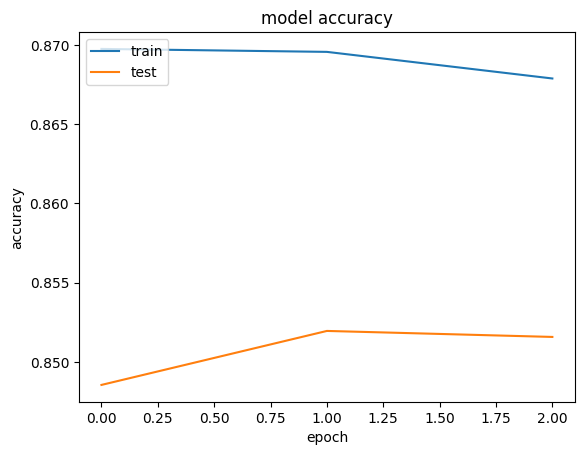

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

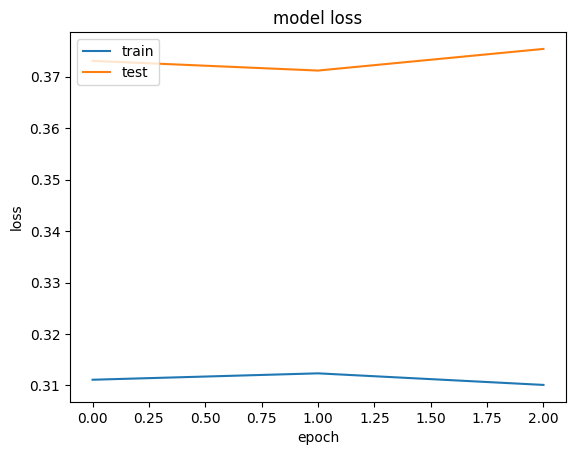

In [42]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [49]:
#make the confusion matrix, accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,y_pred)
score = accuracy_score(Y_test,y_pred)
print(cm)
print(score)

[[1497   98]
 [ 202  203]]
0.85


In [50]:
#get the weights
classifier.get_weights()

[array([[ 0.3967471 ,  0.26014262,  0.48351073,  0.12122152,  0.03184605,
          0.15731813,  0.21934111,  0.17129329,  0.09722118,  0.04143973,
          0.35105574],
        [ 0.7285419 ,  0.26906645, -0.09737958,  0.52050143,  1.049447  ,
          0.29324394, -0.20480868, -0.5221407 , -0.36285084,  0.26078907,
          0.21229987],
        [-0.07058817, -0.32892263,  0.17039797, -0.487013  , -0.37246493,
          0.1849491 , -0.5964115 ,  0.37724766, -0.5597552 ,  0.12387599,
         -0.01254275],
        [-0.7050112 , -0.4077388 , -0.31878874,  0.06137328, -0.232627  ,
         -0.09669348, -0.12993355, -0.30389035, -0.30941007, -0.6157827 ,
         -0.08327185],
        [ 0.08440629, -0.58626306,  0.01852462,  0.26732013, -0.7328316 ,
          1.0175792 ,  0.3343448 , -0.2966853 ,  0.05356279, -1.1584488 ,
          0.70399106],
        [ 0.19583891,  0.46043354,  0.10500766,  0.14304712, -0.2925106 ,
         -0.08301482,  0.27355984, -0.21914327,  0.01698651, -0.0902822